#Intelligent Systems - Assignment 3

- Member Names: Gorka Legarreta & Guillermo Pérez
- Group ID: B
- Assignment: 3
- Date: 2022-04-27
- Time spent in the assignment: 15h
- Proportion of effort done by members of the group: 85% Gorka Legarreta and 15% Guillermo Pérez
- Doubts and difficulties that arose during the realization: We had to understand first the purpose of the algorithms and the way they worked, then it was just to put the precise pieces of code in its places.


---

**General instructions**
 1. If you use a function of a certain library, do not forget to include the corresponding command to install or load the library
 2. Do not forget to comment on the code, especially those non-trivial commands (part of the rating depends on the cleaning of the code)
 3. It is strongly recommended to test any implemented function in order to    check for its proper operation

---

 **Submission**
- Print the notebook in a PDF file with all the sections expanded and all the cells executed, in a way all the code can be seen, and all the results are shown.
- Save the notebook as ipynb file.
- Submit both files, in addition to any input file needed for its execution in a zip folder into ALUD

---

**Evaluation**
- Total Evaluation - 12,5%.
  - Correct and error-free execution
  - Efficiency and cleanness of the code
  - Documentation and analysis of results

---
**Deadline**: 2022-04-27

In [ ]:
# PLEASE, INCLUDE HERE IF YOU USE ANY ADDITIONAL LIBRARY
library(glue)

## Problem statement (P-Hub problem)

The p-hub problem consists of selecting **p** primary airports and linking the remaining airports to the nearest primary airport in such a way as to minimize the time (or distance) between any pair of origin-destination airports.
- To travel between secondary airports, connections must be made between primary airports.
- Each secondary airport connects to the nearest major airport.


An instance of the problem is defined by:
- Size: total number of airports
- (an empty line)
- Matrix of distances between each pair of airports.


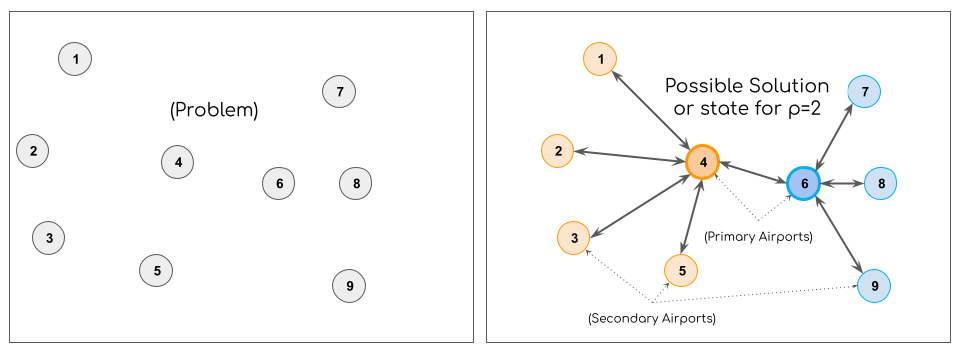

**Objective of the problem:**
Select "P" major airports such that the sum of the distance between each pair of airports is the smallest possible.

**IMPORTANT: The result is the final state.**

You are provided with the formulation of the problem, so you have to focus on the implementation of the requested methods. 

---

**You are asked to**

1. Implement the Random Restart Hill Climbing Algorithm
  - RRHC = function(problem, iterations, repetitions) {...}
2. Implement the Local Beam Search Algorithm
  - LBS = function(problem, beams, iterations) {...}
3. Run both algorithms and the Hill Climber provided on the different problems provided for p = {2, 5, 10}, executing each algorithm for iterations = {50},  beams = {3, 5, 10} (for LBS) and repetitions = {10} (for RRHC). Repeat each test 10 times.
  - You can use nested loops to iterate through the different files, iteration numbers, beams and repetition. Then, to store each result in a table to display at the end of the execution to analyze results.
4. Analyze the obtained performance of the experimentation.
5. The performance of the algorithms is limited by the formulation since the actions possible are only to take one of the *p* hubs assigned and interchange by a randomly selected airport. Answer (with text, no need for coding):
 - What changes in the formulation would imply to explore all possible interchanges between any hub and airport?
 - What changes in the formulation would imply exploring 2, 3 or more random replacements of each one of the hubs assigned in the current state?
 - What changes in the formulation would imply exploring a variable number of hubs for the solution? For instance, to search a solution with a number of hubs between 2 and 5 (apart from having 2 input parameters *pmin* and *pmax*).





# Search methods

🛑 (you don't have to modify here, just run)

## Expansion of a Node and Show path to a node

In [ ]:
expand.node = function(node, problem){
  newnodes = list()
  actions.possible = problem$actions.possible
  for (i in 1:nrow(actions.possible)){
    action = actions.possible[i, ]
    state = node$state
    if (is.applicable(state,action,problem)){
      newnode = list()
      newnode$parent  = node
      newnode$parent$parent = NULL
      newnode$state   = effect(state,action)    
      newnode$actions = rbind(node$actions,action)
      newnode$depth   = node$depth+1
      newnode$cost    = node$cost+get.cost(actions.possible[i,],state)
      newnode$evaluation = get.evaluation(newnode$state,problem)
      newnodes        = append(newnodes,list(newnode))
    }
  }
  return(newnodes)
}

In [ ]:
to.string = function (state){
    print(state)
}

In [ ]:
show.path = function(problem,result){
  current = problem$state.initial
  to.string(current)
  for (i in 1:nrow(result$final.state$actions)){
    print(glue(""))
    print(glue("Action taken: {result$final$actions[i,]}"))
    current = effect(current, result$final$actions[i,])
    to.string(current)
  }
}

## BFS.gs - Breadth First Search with Graph Search

In [ ]:
BFS.gs = function(problem, count.limit = 100){  
  result = list(method = "BFS-GS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier and the expanded list
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0)
  frontier = list(node)
  expanded = list()

  count = 1
  
  while (TRUE){    
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 2) Extraction of the first node and inclusion on expanded list
    firstnode = frontier[[1]]; 
    frontier[[1]] = NULL        
    expanded = append(expanded,list(firstnode))

    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status = "Solution Found"; break}
    
    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 

    # (step 5) Inclusion in the frontier of those nodes not expanded
    if (length(newnodes)>0){
      for (i in 1:length(newnodes)){
        newnode = newnodes[[i]]
        if (!any(sapply(frontier,function (x) identical(x$state,newnode$state)))){
          if (!any(sapply(expanded,function (x) identical(x$state,newnode$state)))){
              frontier = append(frontier,list(newnode))
          }
        }
      }
    }

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

## Greedy Best First Search (GBFS) method



In [ ]:
GBFS = function(problem,count.limit=100){
  result = list(method = "GBFS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)

 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0,
              evaluation = get.evaluation(problem$state.initial,problem))
  frontier = list(node)

  count = 1
  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}

    # (step 2) Extraction of the first node
    firstnode = frontier[[1]]; 
    frontier[[1]] = NULL  

    # (step 3) Check if final state
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}

    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
    
    # (step 5) Inclusion of the successors in the frontier
    frontier = c(frontier,newnodes) 

    # (step 6) Reorder frontier according with Evaluation
    frontier = frontier[order(sapply(frontier,function (x) x$evaluation))]

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }

  result$final.state = firstnode
  return(result)
}

## Hill Climber

In [ ]:
HC = function(problem, count.limit=100){
  result = list(method = "HC", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)
 # (step 1) Initialization of the frontier
  node = list(parent=c(), state=problem$state.initial, actions=c(), depth=0, cost=0,
              evaluation = get.evaluation(problem$state.initial, problem))
  frontier = list(node)

  count = 1
  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==count.limit){result$status = "Maximum number of iterations reached";break}
    
    # (step 2) Extraction of the first (and only) node
    firstnode = frontier[[1]]; 
    frontier[[1]] = NULL  

    # (step 3) Check if final state (usually not)
    if (is.final.state(firstnode$state,problem)){result$status="Solution Found";break}

    # (step 4) Expansion of the node
    newnodes = expand.node(firstnode, problem) 
  
    # (step 5) Reorder the new generated nodes to get the first (best)
    newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]
    newnode = newnodes[[1]]
    
    # (step 6) Check if the newnode is better than the actual (firstonde)
    #print(glue("The current node is {firstnode$evaluation}, the best successor is {newnode$evaluation}"))
    if (firstnode$evaluation > newnode$evaluation){
      frontier = list(newnode)
    } else{
      result$status="Local Optimum Found";break
    }

    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,firstnode$depth)
    result$iterations = count

    count = count+1
  }
  result$final.state = firstnode
  return(result)
}

# Problem Formulation 

🛑 (you don't have to modify here, just run)

In [ ]:
initialize.problem = function(filename, p){
  problem <- list()
  problem$p         = p
  problem$size      = as.numeric(unlist(read.csv(filename, header=FALSE, nrows=1)))
  problem$distances = read.csv(filename, header=FALSE, skip=problem$size+2, dec=".", sep=" ")

  problem$state.initial = sample(c(1:problem$size), problem$p)
  problem$state.final   = NULL
  problem$actions.possible = data.frame(action = c(1:problem$p), stringsAsFactors = FALSE)

  problem$name      = paste0("p-Hub - [", filename, " - p=", problem$p, "]")
  return(problem)
}

In [ ]:
is.applicable = function (state,action,problem){
  return(TRUE)
}

In [ ]:
effect = function (state,action){
  result = state 
  result[action] = sample(setdiff(c(1:problem$size), state), 1)  
  return(result)
}

In [ ]:
is.final.state = function (state,finalstate=NULL){
  return(FALSE)
}

In [ ]:
to.string = function (state){
  return(paste0(state, collapse = ", "))
}

In [ ]:
get.cost = function (action,state){
  return(1)
}

In [ ]:
split.airports = function(state, problem) {
  airports_lists = vector(mode = "list", length = problem$p)
  for (i in 1:problem$p) {
    airports_lists[[i]] = c(airports_lists[[i]], state[i])
  }
  for (i in 1:problem$size) {
    if (!(i %in% state)) {
      distance_to_hub = lapply(state, FUN = function(x, y) { return(problem$distances[x,y]) }, y=i)
      hub = which.min(distance_to_hub)
      airports_lists[[hub]] = c(airports_lists[[hub]], i)
    }
  }  
  return(airports_lists)
}

In [ ]:
get.hub = function(airport, airports_lists) {
  for (i in 1:length(airports_lists)) {
    if (airport %in% airports_lists[[i]]) {
      return(i)
    }
  }
}

In [ ]:
get.evaluation = function(state, problem){
total_distance = 0
  i = 1  
  airports_lists = split.airports(state, problem)
  while (i <= problem$size) {
    j = i+1    
    while (j <= problem$size) {
      hub_i = get.hub(i, airports_lists)
      hub_j = get.hub(j, airports_lists)

      total_distance = total_distance + 
        problem$distances[i, airports_lists[[hub_i]][1]] +
        problem$distances[j, airports_lists[[hub_j]][1]]

      if (hub_i != hub_j) {
        total_distance = total_distance + 
          problem$distances[airports_lists[[hub_i]][1], airports_lists[[hub_j]][1]]
      }      
      j = j+1
    }    
    i = i+1
  }  
	return(total_distance)
}

# Solving and comparison

🚨 (You are asked for modifications here)

## This is the function **RRHC** that we have implemented:
This algorithm is the same thing as the Hill Climber, but with the difference that it restarts the number of times that we specify on the repetitions, so it has got more chances to get better final results.

In [ ]:
RRHC = function(filename, p, iterations, repetitions) {

  results = list()    
  
  for(i in 1:repetitions){
    # (Step 1) We create a random restart initializing a new problem
    problem = initialize.problem(filename, p)
    # (Step 2) We do the HC
    res = HC(problem, iterations)
    # (Step 3) We create a list with all the results:
    results[[i]] = res                   
  }
  
  # (Step 4) We return the optimal solution:  
  minimo = results[[1]]
  for (result in results){
    if(result$final.state$evaluation <= minimo$final.state$evaluation){
      minimo = result
    }
  }
  minimo$method = "RRHC"              
  return (minimo)
}

This code is just to you to see the formulation is ok!

In [ ]:
problem = initialize.problem("AP40.txt", 2)
res = RRHC("AP40.txt",2, 100, 10)
res$final.state$state
res$final.state$evaluation
res$status

##This is the **LBS** method that we implemented:
This local search algorithm has its particularity, it works the same way as the Hill Climber but instead, the frontier is going to have beams number of nodes. In this occasion it evaluates more than just a single node and it can get better solutions than the Hill Climber. The results have more chances to be better with more beams on the frontier.

In [ ]:
LBS = function(filename, p, beams, iterations) {
  # Initialize.problem "beams" veces y meteremos en la frontera todos los state_initial
  result = list(method = "LBS", final.state = c(),status = "",
                max.frontier = 0, max.depth = 0, iterations = 0)
  
  # (step 1) Initialization of the frontier  
  frontier = list() 
  for (i in 1:beams){
    problem = initialize.problem(filename, p)
    node = list(parent=c(), state = problem$state.initial , actions=c(), depth=0, cost=0,
              evaluation = get.evaluation(problem$state.initial, problem))
    frontier[[i]] = node
  }
  frontier = frontier[order(sapply(frontier,function (x) x$evaluation))]
  
  count = 1  
  while (TRUE){
    if (length(frontier)==0){result$status = "No nodes in the frontier. No solution possible.";break}
    if (count==iterations){result$status = "Maximum number of iterations reached";break}
    
    # (step 2) Extraction of the nodes in the frontier
    firstnodes = list()    
    for (i in 1:beams){
      firstnodes[[i]] = frontier[[i]];
    }
    firstnodes = firstnodes[order(sapply(firstnodes,function (x) x$evaluation))]
    
    # (step 3) Check if final state (usually not)
    if (is.final.state(firstnodes[[1]]$state,problem)){
      result$status="Solution Found";break
    }

    # (step 4) Expansion of the nodes on the frontier
    newnodes = list()
    for (i in 1:beams){
      newnodes = append(newnodes, expand.node(firstnodes[[i]], problem)) 
    }  
    
    # (step 5) Reorder the new generated nodes:
    newnodes = newnodes[order(sapply(newnodes,function (x) x$evaluation))]   
    
    
    # (step 6) Check if the newnodes are better than the actual (firstnodes)
    # print(glue("The current node is {firstnode$evaluation}, the best successor is {newnode$evaluation}"))
    
    #We generate a list with all the expanded nodes and the nodes on the frontier, then we reorder
    
    firstnodes = append(firstnodes, newnodes)
    firstnodes = firstnodes[order(sapply(firstnodes,function (x) x$evaluation))]

    # We compare if the new firstnodes are the same as before (in that case we already found the local optimum)
    for (i in 1:beams){
      if (frontier[[i]]$evaluation > newnodes[[i]]$evaluation){
        frontier[[i]] = firstnodes[[i]]
      }
    }
    
    sames = 0
    for (i in 1:beams){
      if(frontier[[i]]$evaluation == firstnodes[[i]]$evaluation){
        sames = sames+1
      }
    }
    if (sames == beams){
      result$status="Local Optimum Found";break
    }
    result$max.frontier = max(result$max.frontier,length(frontier))
    result$max.depth = max(result$max.depth,frontier[[1]]$depth)
    result$iterations = count

    count = count+1
  }
  
  result$final.state = frontier[[1]]
  return(result)
} 

This code is just to you to see the formulation is ok!

In [ ]:
res = LBS("AP40.txt",2, 5, 100)
res$final.state$state
res$final.state$evaluation
res$status

##Results & Analysis

In this part we have all the results for HC, RRHC and LBS (beams = 3,5,10) for every file and also for every number of primary airports P. Therefor, to visualize the results it may be enough to run only the code within the first file because it can take a lot of time to execute everything, even if it is al working. We adjusted the number of the repetitions of the test to perform better in this sence.

**Conclusions:**

The **Hill Climber** has a random start, and although it will always find the Local Optimal Solution, this solution is probably not near to the global optimal solution.

Meanwhile, the **Random Restart Hill Climber** has very high possibilities of obtaining better solutions than the HC within all the repetitions of the tests, due to its several restarts in each test. Nevertheless, this method is the algorithm that takes more time to run the code.

Whereas, in the **Local Beam Search** algorithm the number of beams determines the number of nodes in the frontier, so the more beams we have in the frontier, the test has higher possibilities to obtain better results in each execution.

### AP40
Here we see all the solutions of the algorithms working on this file

#### Results for p = 2

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:10){
  problem = initialize.problem("AP40.txt", 2)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2hc = df$Evaluations[index]
avg2hc = mean(df$Evaluations)
time2hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:10){
  res = RRHC("AP40.txt",2, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2rrhc = df$Evaluations[index]
avg2rrhc = mean(df$Evaluations)
time2rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:10){
  res = LBS("AP40.txt",2, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs3 = df$Evaluations[index]
avg2lbs3 = mean(df$Evaluations)
time2lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:10){
  res = LBS("AP40.txt",2, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs5 = df$Evaluations[index]
avg2lbs5 = mean(df$Evaluations)
time2lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:10){
  res = LBS("AP40.txt",2, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs10 = df$Evaluations[index]
avg2lbs10 = mean(df$Evaluations)
time2lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs10}"))

In [ ]:
res2 = list(res2hc, res2rrhc, res2lbs3, res2lbs5, res2lbs10)

print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res2hc - res2rrhc}"))
print(glue("The difference between HC and LBS3 is {res2hc - res2lbs3}"))
print(glue("The difference between HC and LBS5 is {res2hc - res2lbs5}"))
print(glue("The difference between HC and LBS10 is {res2hc - res2lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res2rrhc - res2lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res2rrhc - res2lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res2rrhc - res2lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res2lbs3 - res2lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res2lbs3 - res2lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res2lbs5 - res2lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg2hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg2rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg2lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg2lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg2lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time2hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time2rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time2lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time2lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time2lbs10} seconds"))

####Results for p = 5

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:5){
  problem = initialize.problem("AP40.txt", 5)
  res = HC(problem)
  
  states[[i]] = as.character(res$final.state$state)
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5hc = df$Evaluations[index]
avg5hc = mean(df$Evaluations)
time5hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:5){
  res = RRHC("AP40.txt",5, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5rrhc = df$Evaluations[index]
avg5rrhc = mean(df$Evaluations)
time5rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:5){
  res = LBS("AP40.txt",5, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs3 = df$Evaluations[index]
avg5lbs3 = mean(df$Evaluations)
time5lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:5){
  res = LBS("AP40.txt",5, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs5 = df$Evaluations[index]
avg5lbs5 = mean(df$Evaluations)
time5lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:5){
  res = LBS("AP40.txt",5, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs10 = df$Evaluations[index]
avg5lbs10 = mean(df$Evaluations)
time5lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res5hc - res5rrhc}"))
print(glue("The difference between HC and LBS3 is {res5hc - res5lbs3}"))
print(glue("The difference between HC and LBS5 is {res5hc - res5lbs5}"))
print(glue("The difference between HC and LBS10 is {res5hc - res5lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res5rrhc - res5lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res5rrhc - res5lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res5rrhc - res5lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res5lbs3 - res5lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res5lbs3 - res5lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res5lbs5 - res5lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg5hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg5rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg5lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg5lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg5lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time5hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time5rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time5lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time5lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time5lbs10} seconds"))

####Results for p = 10

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP40.txt", 10)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10hc = df$Evaluations[index]
avg10hc = mean(df$Evaluations)
time10hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP40.txt",10, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10rrhc = df$Evaluations[index]
avg10rrhc = mean(df$Evaluations)
time10rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP40.txt",10, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs3 = df$Evaluations[index]
avg10lbs3 = mean(df$Evaluations)
time10lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP40.txt",10, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs5 = df$Evaluations[index]
avg10lbs5 = mean(df$Evaluations)
time10lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP40.txt",10, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs10 = df$Evaluations[index]
avg10lbs10 = mean(df$Evaluations)
time10lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res10hc - res10rrhc}"))
print(glue("The difference between HC and LBS3 is {res10hc - res10lbs3}"))
print(glue("The difference between HC and LBS5 is {res10hc - res10lbs5}"))
print(glue("The difference between HC and LBS10 is {res10hc - res10lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res10rrhc - res10lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res10rrhc - res10lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res10rrhc - res10lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res10lbs3 - res10lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res10lbs3 - res10lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res10lbs5 - res10lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg10hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg10rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg10lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg10lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg10lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time10hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time10rrhc} minutes"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time10lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time10lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time10lbs10} seconds"))

### AP50
Here we see all the solutions of the algorithms working on this file

#### Results for p = 2

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP50.txt", 2)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2hc = df$Evaluations[index]
avg2hc = mean(df$Evaluations)
time2hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP50.txt",2, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2rrhc = df$Evaluations[index]
avg2rrhc = mean(df$Evaluations)
time2rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",2, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs3 = df$Evaluations[index]
avg2lbs3 = mean(df$Evaluations)
time2lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",2, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs5 = df$Evaluations[index]
avg2lbs5 = mean(df$Evaluations)
time2lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",2, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs10 = df$Evaluations[index]
avg2lbs10 = mean(df$Evaluations)
time2lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs10}"))

**Conclusions:**

In [ ]:
res2 = list(res2hc, res2rrhc, res2lbs3, res2lbs5, res2lbs10)

print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res2hc - res2rrhc}"))
print(glue("The difference between HC and LBS3 is {res2hc - res2lbs3}"))
print(glue("The difference between HC and LBS5 is {res2hc - res2lbs5}"))
print(glue("The difference between HC and LBS10 is {res2hc - res2lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res2rrhc - res2lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res2rrhc - res2lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res2rrhc - res2lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res2lbs3 - res2lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res2lbs3 - res2lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res2lbs5 - res2lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg2hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg2rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg2lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg2lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg2lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time2hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time2rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time2lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time2lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time2lbs10} seconds"))

#### Results for p = 5

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP50.txt", 5)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5hc = df$Evaluations[index]
avg5hc = mean(df$Evaluations)
time5hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP50.txt",5, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5rrhc = df$Evaluations[index]
avg5rrhc = mean(df$Evaluations)
time5rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP40.txt",5, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs3 = df$Evaluations[index]
avg5lbs3 = mean(df$Evaluations)
time5lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",5, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs5 = df$Evaluations[index]
avg5lbs5 = mean(df$Evaluations)
time5lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",5, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs10 = df$Evaluations[index]
avg5lbs10 = mean(df$Evaluations)
time5lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res5hc - res5rrhc}"))
print(glue("The difference between HC and LBS3 is {res5hc - res5lbs3}"))
print(glue("The difference between HC and LBS5 is {res5hc - res5lbs5}"))
print(glue("The difference between HC and LBS10 is {res5hc - res5lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res5rrhc - res5lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res5rrhc - res5lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res5rrhc - res5lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res5lbs3 - res5lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res5lbs3 - res5lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res5lbs5 - res5lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg5hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg5rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg5lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg5lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg5lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time5hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time5rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time5lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time5lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time5lbs10} seconds"))

#### Results for p = 10

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP50.txt", 10)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10hc = df$Evaluations[index]
avg10hc = mean(df$Evaluations)
time10hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP50.txt",10, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10rrhc = df$Evaluations[index]
avg10rrhc = mean(df$Evaluations)
time10rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",10, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs3 = df$Evaluations[index]
avg10lbs3 = mean(df$Evaluations)
time10lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",10, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs5 = df$Evaluations[index]
avg10lbs5 = mean(df$Evaluations)
time10lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP50.txt",10, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs10 = df$Evaluations[index]
avg10lbs10 = mean(df$Evaluations)
time10lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res10hc - res10rrhc}"))
print(glue("The difference between HC and LBS3 is {res10hc - res10lbs3}"))
print(glue("The difference between HC and LBS5 is {res10hc - res10lbs5}"))
print(glue("The difference between HC and LBS10 is {res10hc - res10lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res10rrhc - res10lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res10rrhc - res10lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res10rrhc - res10lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res10lbs3 - res10lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res10lbs3 - res10lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res10lbs5 - res10lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg10hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg10rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg10lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg10lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg10lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time10hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time10rrhc} minutes"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time10lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time10lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time10lbs10} seconds"))

**BEYOND THIS POINT WE ARE ONLY GOING TO RUN THE AP100 AND AP200 FILES BECAUSE IT CAN TAKE TOO MUCH TIME AND IT IS NOT NECCESARY IN ORDER TO CARRY OUT THE ANALYSIS.**

### AP100

####Results for p = 2

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP100.txt", 2)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2hc = df$Evaluations[index]
avg2hc = mean(df$Evaluations)
time2hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP100.txt",2, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2rrhc = df$Evaluations[index]
avg2rrhc = mean(df$Evaluations)
time2rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",2, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs3 = df$Evaluations[index]
avg2lbs3 = mean(df$Evaluations)
time2lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",2, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs5 = df$Evaluations[index]
avg2lbs5 = mean(df$Evaluations)
time2lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",2, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs10 = df$Evaluations[index]
avg2lbs10 = mean(df$Evaluations)
time2lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res2hc - res2rrhc}"))
print(glue("The difference between HC and LBS3 is {res2hc - res2lbs3}"))
print(glue("The difference between HC and LBS5 is {res2hc - res2lbs5}"))
print(glue("The difference between HC and LBS10 is {res2hc - res2lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res2rrhc - res2lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res2rrhc - res2lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res2rrhc - res2lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res2lbs3 - res2lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res2lbs3 - res2lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res2lbs5 - res2lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg2hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg2rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg2lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg2lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg2lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time2hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time2rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time2lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time2lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time2lbs10} seconds"))

####Results for p = 5

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP100.txt", 5)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5hc = df$Evaluations[index]
avg5hc = mean(df$Evaluations)
time5hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP100.txt",5, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5rrhc = df$Evaluations[index]
avg5rrhc = mean(df$Evaluations)
time5rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",5, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs3 = df$Evaluations[index]
avg5lbs3 = mean(df$Evaluations)
time5lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",5, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs5 = df$Evaluations[index]
avg5lbs5 = mean(df$Evaluations)
time5lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",5, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs10 = df$Evaluations[index]
avg5lbs10 = mean(df$Evaluations)
time5lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res5hc - res5rrhc}"))
print(glue("The difference between HC and LBS3 is {res5hc - res5lbs3}"))
print(glue("The difference between HC and LBS5 is {res5hc - res5lbs5}"))
print(glue("The difference between HC and LBS10 is {res5hc - res5lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res5rrhc - res5lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res5rrhc - res5lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res5rrhc - res5lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res5lbs3 - res5lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res5lbs3 - res5lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res5lbs5 - res5lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg5hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg5rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg5lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg5lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg5lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time5hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time5rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time5lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time5lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time5lbs10} seconds"))

####Results for p = 10

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP100.txt", 10)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10hc = df$Evaluations[index]
avg10hc = mean(df$Evaluations)
time10hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP100.txt",10, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10rrhc = df$Evaluations[index]
avg10rrhc = mean(df$Evaluations)
time10rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",10, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs3 = df$Evaluations[index]
avg10lbs3 = mean(df$Evaluations)
time10lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",10, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs5 = df$Evaluations[index]
avg10lbs5 = mean(df$Evaluations)
time10lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP100.txt",10, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs10 = df$Evaluations[index]
avg10lbs10 = mean(df$Evaluations)
time10lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res10hc - res10rrhc}"))
print(glue("The difference between HC and LBS3 is {res10hc - res10lbs3}"))
print(glue("The difference between HC and LBS5 is {res10hc - res10lbs5}"))
print(glue("The difference between HC and LBS10 is {res10hc - res10lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res10rrhc - res10lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res10rrhc - res10lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res10rrhc - res10lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res10lbs3 - res10lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res10lbs3 - res10lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res10lbs5 - res10lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg10hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg10rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg10lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg10lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg10lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time10hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time10rrhc} minutes"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time10lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time10lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time10lbs10} seconds"))

###AP200

####Results for p = 2

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP200.txt", 2)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2hc = df$Evaluations[index]
avg2hc = mean(df$Evaluations)
time2hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP200.txt",2, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2rrhc = df$Evaluations[index]
avg2rrhc = mean(df$Evaluations)
time2rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",2, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs3 = df$Evaluations[index]
avg2lbs3 = mean(df$Evaluations)
time2lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",2, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs5 = df$Evaluations[index]
avg2lbs5 = mean(df$Evaluations)
time2lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",2, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res2lbs10 = df$Evaluations[index]
avg2lbs10 = mean(df$Evaluations)
time2lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res2lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res2hc - res2rrhc}"))
print(glue("The difference between HC and LBS3 is {res2hc - res2lbs3}"))
print(glue("The difference between HC and LBS5 is {res2hc - res2lbs5}"))
print(glue("The difference between HC and LBS10 is {res2hc - res2lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res2rrhc - res2lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res2rrhc - res2lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res2rrhc - res2lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res2lbs3 - res2lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res2lbs3 - res2lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res2lbs5 - res2lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg2hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg2rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg2lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg2lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg2lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time2hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time2rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time2lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time2lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time2lbs10} seconds"))

####Results for p = 5

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP200.txt", 5)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5hc = df$Evaluations[index]
avg5hc = mean(df$Evaluations)
time5hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP200.txt",5, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5rrhc = df$Evaluations[index]
avg5rrhc = mean(df$Evaluations)
time5rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",5, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs3 = df$Evaluations[index]
avg5lbs3 = mean(df$Evaluations)
time5lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",5, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs5 = df$Evaluations[index]
avg5lbs5 = mean(df$Evaluations)
time5lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",5, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res5lbs10 = df$Evaluations[index]
avg5lbs10 = mean(df$Evaluations)
time5lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res5lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res5hc - res5rrhc}"))
print(glue("The difference between HC and LBS3 is {res5hc - res5lbs3}"))
print(glue("The difference between HC and LBS5 is {res5hc - res5lbs5}"))
print(glue("The difference between HC and LBS10 is {res5hc - res5lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res5rrhc - res5lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res5rrhc - res5lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res5rrhc - res5lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res5lbs3 - res5lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res5lbs3 - res5lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res5lbs5 - res5lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg5hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg5rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg5lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg5lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg5lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time5hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time5rrhc} seconds"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time5lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time5lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time5lbs10} seconds"))

####Results for p = 10

HC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  problem = initialize.problem("AP200.txt", 10)
  res = HC(problem)
  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10hc = df$Evaluations[index]
avg10hc = mean(df$Evaluations)
time10hc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10hc}"))

RRHC:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = RRHC("AP200.txt",10, 100, 10)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10rrhc = df$Evaluations[index]
avg10rrhc = mean(df$Evaluations)
time10rrhc = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10rrhc}"))

LBS with 3 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",10, 3, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs3 = df$Evaluations[index]
avg10lbs3 = mean(df$Evaluations)
time10lbs3 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs3}"))

LBS with 5 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",10, 5, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs5 = df$Evaluations[index]
avg10lbs5 = mean(df$Evaluations)
time10lbs5 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs5}"))

LBS with 10 beams:

In [ ]:
states = list()
evaluations = list()
status = list()
start_time = Sys.time()
for (i in 1:3){
  res = LBS("AP200.txt",10, 10, 100)  
  states[[i]] = res$final.state$state
  evaluations[[i]] = res$final.state$evaluation
  status[[i]] = res$status
}
end_time = Sys.time()
df = data.frame(I(states),unlist(evaluations), unlist(status))
names(df) = c("States", "Evaluations", "Status")
print(df)
index = which.min(df$Evaluations)
res10lbs10 = df$Evaluations[index]
avg10lbs10 = mean(df$Evaluations)
time10lbs10 = end_time - start_time
print(glue("The optimal solution for this test is '{df$States[index]}' and its evaluation cost is: {res10lbs10}"))

**Conclusions:**

In [ ]:
print(glue("All the algorithms reach quite a similar number and states, but they incrementally take more time to carry out the calculations."))
print(glue("1.-"))
print(glue("Differences between the evaluations among the algorithms:"))
print(glue("The difference between HC and RRHC is {res10hc - res10rrhc}"))
print(glue("The difference between HC and LBS3 is {res10hc - res10lbs3}"))
print(glue("The difference between HC and LBS5 is {res10hc - res10lbs5}"))
print(glue("The difference between HC and LBS10 is {res10hc - res10lbs10}"))

print(glue("The difference between RRHC and LBS3 is {res10rrhc - res10lbs3}"))
print(glue("The difference between RRHC and LBS5 is {res10rrhc - res10lbs5}"))
print(glue("The difference between RRHC and LBS10 is {res10rrhc - res10lbs10}"))

print(glue("The difference between LBS3 and LBS5 is {res10lbs3 - res10lbs5}"))
print(glue("The difference between LBS3 and LBS10 is {res10lbs3 - res10lbs10}"))

print(glue("The difference between LBS5 and LBS10 is {res10lbs5 - res10lbs10}"))

print(glue("2.-"))
print(glue("Regarding the averages obtained with each algorithm: "))
print(glue("The average of all the results obtained with the HC is:"))
print(glue(avg10hc))
print(glue("The average of all the results obtained with the RRHC is:"))
print(glue(avg10rrhc))
print(glue("The average of all the results obtained with the LBS 3 beams is:"))
print(glue(avg10lbs3))
print(glue("The average of all the results obtained with the LBS 5 beams is:"))
print(glue(avg10lbs5))
print(glue("The average of all the results obtained with the LBS 10 beams is:"))
print(glue(avg10lbs10))


print(glue("3.-"))
print(glue("Regarding the time of execution obtained with each algorithm: "))
print(glue("The time of execution for the HC algorithm is:"))
print(glue("{time10hc} seconds"))
print(glue("The time of execution for the RRHC algorithm is:"))
print(glue("{time10rrhc} minutes"))
print(glue("The time of execution for the LBS algorithm with 3 beams is:"))
print(glue("{time10lbs3} seconds"))
print(glue("The time of execution for the LBS algorithm with 5 beams is:"))
print(glue("{time10lbs5} seconds"))
print(glue("The time of execution for the LBS algorithm with 10 beams is:"))
print(glue("{time10lbs10} seconds"))

##Answers to the questions:

What changes in the formulation would imply to explore all possible interchanges between any hub and airport?

What changes in the formulation would imply exploring 2, 3 or more random replacements of each one of the hubs assigned in the current state?

What changes in the formulation would imply exploring a variable number of hubs for the solution? For instance, to search a solution with a number of hubs between 2 and 5 (apart from having 2 input parameters pmin and pmax).

1.- We believe that the formulation should be changed as currently it is only able to take an assigned p-hub and change it to a random one, and what we should aim for is to change that p-hub that was assigned by each of the airports explore all exchanges possible.

2.- The answer could be that, where a randomly allocated p-hub is currently being swapped out, to do it 2, 3 or more times, to get more replacements from each of the allocated hubs in the current state and this way we explore more possibilities.

3.- There should be a change in the formulation, since currently it is only able to find the solution for a constant number of p-hubs. It would be necessary to pass the two minimum and maximum values ​​and then evaluate the results obtained for all the possibilities, which can be stored in lists, to return the best ones regardless of the number of corresponding p.